# IELTS Writing Score Prediction

### Introduction ###

Over 3 million IELTS test are taken every year. The popular exam is prerequisite for admission into many higher education institutions. Additionally, IELTS scores are used as proof of English proficiency by immigration authorities in the U.K., New Zealand, Australia, and Canada.

Grading is done along four major skills: Writing, Reading, Speaking, and Listening. The writing section includes two major components: tasks 1 and 2. 

[The official IELTS website](https://ielts.idp.com/prepare/article-ielts-academic-writing-task-1-band-7-task-achievement) provides this descripion for task 1:

In IELTS Academic Writing Task 1, you will be shown a diagram, a visual way to represent information. You may be shown one or more than one diagram. This visual information can be shown as a: 
 - Table 
 - Chart 
 - Diagram
 - Process 
 - Graph 
 - Map 

You will also be given the following instructions:  
Summarise the information by selecting and reporting the main features and make comparisons where relevant. 
You will need to do an information transfer task – the visual information you are given needs to be presented in the form of text.
As part of the task, you will need to: 
Write an introduction 
Write an overview (a summary of what you see) 
Present and highlight the key features with figures (data) 
Let’s take a closer look at the last three points – the introduction, the overview and the key features that need to be presented.


And the following description for task 2:

IELTS Writing Task 2 requires you to write an essay in response to a statement, or premise. You must read the question carefully so that all parts are answered. For example, in the question below, you must do 3 things to achieve a higher band, showing the examiner that you are addressing all parts of the task. 
 - Present one view 
 - Present the other view 
 - Present your opinion 


Grading for both of these sections is conducted by human graders who award or deduct points from the exam-takers based on a detailed rubric linked [here](https://takeielts.britishcouncil.org/sites/default/files/ielts_writing_band_descriptors.pdf). The primary factors considered are task achievement, lexical range, coherence and cohesion, and grammatical range and accuracy. Foundation NLP models are often tasked with determining grammatical accuracy as a demonstration of their language understanding capabilities. In this project, I use BERT, the early encoder model for NLP, to grade both writing tasks. The original BERT paper showcases results on the Corpus of Linguistic Acceptability (CoLA) as a demonstration of the model's ability to learn and understand grammar. With fine-tuning, the BERT model should be able to learn the IELTS rubric, enabling it to grade IELTS writing tasks 

### Loading the Data ###

The data is loaded from the csv file ielts_writing_dataset.csv. The dataset is publicly available through Kaggle and can be found [here](https://www.kaggle.com/datasets/mazlumi/ielts-writing-scored-essays-dataset).

Using Pandas, the data is loaded into a Pandas DataFrame, which can be examined.

In [1]:
import os
import pandas as pd

data_folder = '/Users/seyedmasihzakavi/Desktop/IELTS_Writing/Data'

df_all = pd.read_csv(os.path.join(data_folder, 'ielts_writing_dataset.csv'))

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Task_Type           1435 non-null   int64  
 1   Question            1435 non-null   object 
 2   Essay               1435 non-null   object 
 3   Examiner_Commen     62 non-null     object 
 4   Task_Response       0 non-null      float64
 5   Coherence_Cohesion  0 non-null      float64
 6   Lexical_Resource    0 non-null      float64
 7   Range_Accuracy      0 non-null      float64
 8   Overall             1435 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 101.0+ KB


As seen above, there are no null values for Task_Type, Question, Essay, and Overall Score. There are two task types: 1 and 2. Corresponding to each one, we can train a model and examine its power in grading the responses. 

To build these two datasets, below, two new Pandas DataFrames are created base on task type, df_task_1 and df_task_2.

In [2]:
df_task_1 = df_all[df_all["Task_Type"] == 1][["Question", "Essay", "Overall"]]

df_task_2 = df_all[df_all["Task_Type"] == 2][["Question", "Essay", "Overall"]]

Let's consider a few questions and essays for each task to better understand the data 

In [4]:
pd.set_option('display.max_colwidth', None)

df_task_1.head()

,Question,Essay,Overall
0,"The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant.","Between 1995 and 2010, a study was conducted representing the percentages of people born in Australia, versus people born outside Australia, living in urban, rural, and town. First, in 1995, cities represented the major percentage of habitat by roughly 50 percent, followed by rural areas and towns came in last, among people born in Australia. On the other hand, people born outside Australia, cities showed the most percentages of 6o percent, followed by rural areas and towns. In 2010, among people born in Australia, cities had an increase more than 20 percent increase in the total representation and a major decrease in towns and rural areas. Conversely, people born outside Australia, cities had the most percentage among both studies, followed by rural areas and towns.",5.5
2,"The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant.","The left chart shows the population change happened in Austrilia from 1995 to 2010. In 1995, half of the people born in australia are from cities, 30% from rural areas and only 20% are from towns. For the people outside of Australia, most of the people still born in cities, which is around 60%. but the number of rural areas increased to 40% with the towns born rate decreased to only 10%.\nIn 2010, The people born in cities increased significianly in both in and outside Australia, especially in outside Australia, which reached 80%. The people bore in towns decreased simutanuously, to around 17% of the people born in Australia and 10% of outside Australia respectively. The most significiant change happened at rual areas numbers. It has shrinked to 17% of people born in Australia, and only around 5% of peopel bore outside Australia.\nOverall, the chart shows us the trend that many people moved to Cities from rual area in the past 15 years.",5.0
4,"The graph below shows the number of overseas visitors to three different areas in a European country between 1987 and 2007Summarise the information by selecting and reporting the main features, and make comparisons where relevant.","Information about the thousands of visits from overseas to three different European natural places during 1987 and 2007 is provided in the given line chart.\nOverall, it can be seen that the number of visitors increased significantly in the three places compared to the initial year. Although, visits to Europeans lakes demostrated more changes over the 20 years than its counterparts.\nIn more detail, the most steady growth was experienced by the visits to Europeans mountains. For example, from 1987 the number of visitors grew from 20,000 to almost the double 20 years later. Similarly, visits to the coast also rose after a slight fall in 1992, reaching almost twice as much since 1987, with 75,000.\nThose visiting Europeans lakes subtantially increased over the years from 10 thousand to a peak of 75 thousand in 2002. Despite falling for about 25 thousand in 2007, the visitis to this place remained higher compared to 1987, with 50,000 at the end of the period.",7.0
6,"The graph below shows the number of overseas visitors to three different areas in a European country between 1987 and 2007Summarise the information by selecting and reporting the main features, and make comparisons where relevant.","This graph depicts the changes in tourists visits between 1987 and 2007 to these three places in Europe. It's clear from the graph, that generally the coast area have the highest number of 

Note that the section 1 prompt includes graphs and charts. Here, those are omitted to make training feasible on a smaller NLP model that can be trained on a local machine with limited computational resources

In [5]:
df_task_2.head()

,Question,Essay,Overall
1,"Rich countries often give money to poorer countries, but it does not solve poverty. Therefore, developed countries should give other types of help to the poor countries rather than financial aid. To what extent do you agree or disagree?","Poverty represents a worldwide crisis. It is the ugliest epidemic in a region, which could infect countries in the most debilitating ways. To tackle this issue, rich countries need to help those in need and give a hand when possible. I agree that there are several ways of aiding poor countries other than financial aid, like providing countries in need with engineers, workers, and soldiers who would build infrastructure. Building universities, hospitals, and roadways. By having a solid infrastructure, poor countries would be able to monetise their profits and build a stronger and more profitable economy which would help them in the long term. Once unprivilged countries find their niche, the major hurdle would be passed and would definitely pave the way for much brighter future. However, I do disagree that financial aid does not solve poverty, it does if used properly and efficiently. The most determining factor if financial aid would be the way to go, is by identifying what type of poor countries' representative are dealing with. Some countries will have a responsible leader and some will not, with that being said, implementing a strategy, to distinguish responsible leaders from others, would tailor the type of aid rich countries could use. An example, A clear report and constant observation would be applied to track the progress and how this type of aid is being monetized. In summary, types of aid varies from country to another, and tailoring the type of aid is of paramount importance to solve this problem that had huge toll on poor countries.",6.5
3,"Rich countries often give money to poorer countries, but it does not solve poverty. Therefore, developed countries should give other types of help to the poor countries rather than financial aid. To what extent do you agree or disagree?","Human beings are facing many challenges nowadays. Poverty is always an critical topic among countries, especially the poverty in developing countries. Developed countries frequently offer financial support to poor countries but the poverty still exist. Experts are arguing that developed countries should consider other solutions to help solve the poverty issue. I believe this is a much better direction compare to money support only.\nMoney is essential to many factors like food, contruction and hospital. With money provided by developed countries, govenment can improve the inforstructure, supporting poor family with food, building more houses for the poor people, builing more schools to support children's education, which is critical for people to get out of poverty.\nBut money cannot solve everything. The poverty caused by many reasons like lacking of resource and experienced governor. None of them could be solved by simply offering money to the goverment. Besides, money could cause a bad habit to the governor, they may reply on the financial support too much. If the financial support ended someday, which could happen anytime in the current circurmestance, it will cause big trouble again.\nDevevloped countries should focus on a sophicated solution instead of just providing money. For example, they can help poor countries to build manufacturing industry, and give certain subsides for the customer who buy directly from them. Developed countries also can send experienced instructor to help governer in poor countries build a better government system to improve the efficiency of governance, authority of justice, to make sure company feel safe to invest in these developing counties, which could have a long term benifit for the people there.\nOverall, I am agree that money could help to solve the poverty but without other support from different functions, it may not the best solution for pov

### Exploratory Data Analysis ###

To better understand the data, we can visualize the distribution of scores for each task

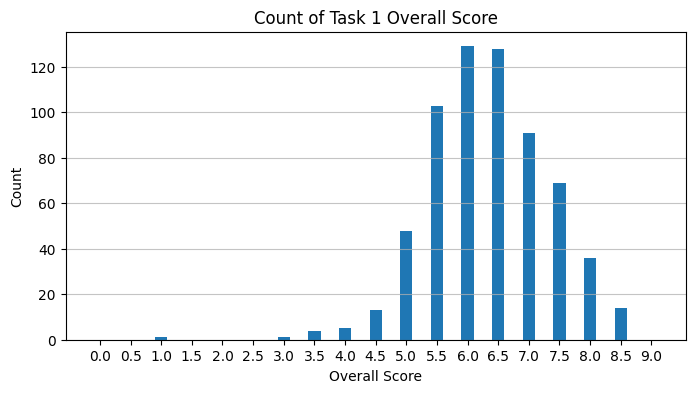

In [6]:
import matplotlib.pyplot as plt

scores = [i*0.5 for i in range(19)]
task_1_scores = [0 for _ in range(len(scores))]
task_2_scores = [0 for _ in range(len(scores))]

for i in range(len(scores)):
    task_1_scores[i] = len(df_task_1[df_task_1['Overall'] == scores[i]])
    task_2_scores[i] = len(df_task_2[df_task_2['Overall'] == scores[i]])

plt.figure(figsize=(8, 4))
plt.bar(scores, task_1_scores, width=0.2)
plt.title('Count of Task 1 Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Count')
plt.xticks(scores)
plt.grid(axis='y', alpha=0.75)
plt.show()

Notice that scores have a normal distirbution centered around 6 - 6.5. Different scores are very unevenly distributed for Task 1, with almost no entries with scores lower than 4 or 9. Below, the same bar plot can be seen for Task 2.

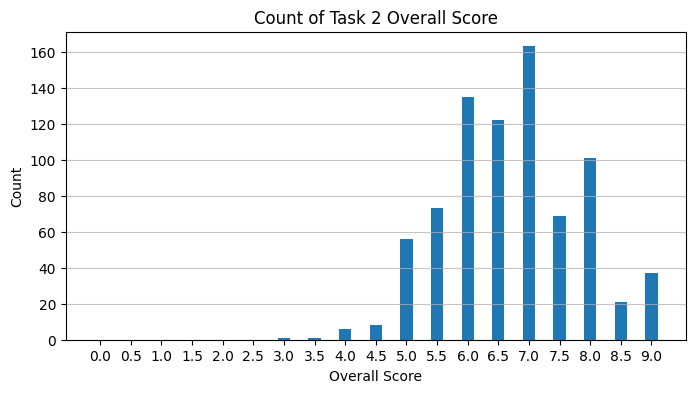

In [7]:
plt.figure(figsize=(8, 4))
plt.bar(scores, task_2_scores, width=0.2)
plt.title('Count of Task 2 Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Count')
plt.xticks(scores)
plt.grid(axis='y', alpha=0.75)
plt.show()

Similar to Task 1, Task 2 scores are normally distributed and centered around 6 - 7. 

### Task 1 Model ###

The model is built on top of BERT to leverage pre-trained weights. The base BERT model from the original paper with 12 layers and attention heads is used here.

In [8]:
from transformers import BertForSequenceClassification, BertConfig, AutoTokenizer

config = BertConfig.from_pretrained('bert-base-uncased', 
                                    num_labels=1, 
                                    problem_type="regression")


model_1 = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      config=config)

/Users/seyedmasihzakavi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/seyedmasihzakavi/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


While only the responses are graded, the questions also contain crucial information which affects the grading. This means both the question and answer need to be provided as input to the model.

The original BERT paper linked [here](https://arxiv.org/pdf/1810.04805.pdf) includes fine-tuning results for question answering tasks. While grading IELTS writing tasks is a regression task, it is very close to question answering tasks from the original paper like SQuAD so it makes the most sense to feed the question and asnwers to the model in the same way. As seen in the screenshot below from the original paper, questions and answers are concatenated and then passed to the model.

![image](BERT_FineTuning.jpg)

Following this design, questions and answers will be concatenated with a special [SEP] token in between.

In the section below, three separate DataFrames are built: Training, Validation, and Testing with 80%-10%-10% ratios. Then the question and answer are concatenated with a [SEP] token and stored in a new column, combined_text. Finally, the BERT tokenizer needs to be applied to the concatenated text before it's fed into the BERT model. This step happens in the EssayDataset class, which implements PyTorch's Dataset and applies the tokenizer before accessing each combined question and essay.

In [9]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from transformers import AutoTokenizer
import torch


task_1_train, task_1_temp = train_test_split(df_task_1, test_size=0.2, random_state=42)
task_1_val, task_1_test = train_test_split(task_1_temp, test_size=0.5, random_state=42)


tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def prepare_dataset(df):
    df['combined_text'] = df['Question'] + " [SEP] " + df['Essay']
    combined_texts = df['combined_text'].tolist()
    labels = df['Overall'].tolist()
    
    tokenized_batch = tokenizer(combined_texts, padding="max_length", 
                                truncation=True, max_length=512)
    
    class EssayDataset(Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
            return item

        def __len__(self):
            return len(self.labels)

    return EssayDataset(tokenized_batch, labels)

task_1_train_dataset = prepare_dataset(task_1_train)
task_1_val_dataset = prepare_dataset(task_1_val)
task_1_test_dataset = prepare_dataset(task_1_test)

BERT's architecture and weights are downloaded through Hugging Face's Transformers library. The model is set to train for 10 epochs, go through linear warmup for 500 steps, and save weights for the model with lowest mean squared error on validation data.

In [10]:
import torch
from transformers import BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import mean_squared_error
import numpy as np


training_args_1 = TrainingArguments(
    output_dir='./results_1',          
    num_train_epochs=10,              
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    load_best_model_at_end=True,
    metric_for_best_model="mse",
    greater_is_better=False
)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    mse = mean_squared_error(labels, predictions)
    return {"mse": mse}

trainer_1 = Trainer(
    model=model_1,
    args=training_args_1,
    train_dataset=task_1_train_dataset,
    eval_dataset=task_1_val_dataset,
    compute_metrics=compute_metrics
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/seyedmasihzakavi/Library/Python/3.9/lib/python/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [11]:
trainer_1.train()

model_path = "./results_1"
model_1.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

  0%|          | 0/650 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
                                                
 10%|█         | 65/650 [01:53<12:57,  1.33s/it]

{'eval_loss': 34.44484329223633, 'eval_mse': 34.444847106933594, 'eval_runtime': 3.8947, 'eval_samples_per_second': 16.433, 'eval_steps_per_second': 2.054, 'epoch': 1.0}


                                                 
 20%|██        | 130/650 [03:49<11:08,  1.29s/it]

{'eval_loss': 22.51834487915039, 'eval_mse': 22.518342971801758, 'eval_runtime': 3.8045, 'eval_samples_per_second': 16.822, 'eval_steps_per_second': 2.103, 'epoch': 2.0}


                                                 
 30%|███       | 195/650 [05:43<09:50,  1.30s/it]

{'eval_loss': 6.526093006134033, 'eval_mse': 6.526093482971191, 'eval_runtime': 3.7795, 'eval_samples_per_second': 16.933, 'eval_steps_per_second': 2.117, 'epoch': 3.0}


                                                 
 40%|████      | 260/650 [07:46<09:03,  1.39s/it]

{'eval_loss': 0.9443441033363342, 'eval_mse': 0.9443441033363342, 'eval_runtime': 4.1961, 'eval_samples_per_second': 15.252, 'eval_steps_per_second': 1.907, 'epoch': 4.0}


                                                 
 50%|█████     | 325/650 [09:50<07:34,  1.40s/it]

{'eval_loss': 0.8789247274398804, 'eval_mse': 0.8789247870445251, 'eval_runtime': 4.2821, 'eval_samples_per_second': 14.946, 'eval_steps_per_second': 1.868, 'epoch': 5.0}


                                                 
 60%|██████    | 390/650 [11:57<06:03,  1.40s/it]

{'eval_loss': 0.5735933780670166, 'eval_mse': 0.5735933780670166, 'eval_runtime': 4.214, 'eval_samples_per_second': 15.187, 'eval_steps_per_second': 1.898, 'epoch': 6.0}


                                                 
 70%|███████   | 455/650 [14:05<04:35,  1.41s/it]

{'eval_loss': 0.6851528882980347, 'eval_mse': 0.6851528882980347, 'eval_runtime': 4.3627, 'eval_samples_per_second': 14.67, 'eval_steps_per_second': 1.834, 'epoch': 7.0}


 77%|███████▋  | 500/650 [15:32<04:42,  1.88s/it]

{'loss': 11.8296, 'grad_norm': 16.327892303466797, 'learning_rate': 1e-05, 'epoch': 7.69}


                                                 
 80%|████████  | 520/650 [16:13<03:10,  1.47s/it]

{'eval_loss': 0.7569351196289062, 'eval_mse': 0.7569351196289062, 'eval_runtime': 4.4528, 'eval_samples_per_second': 14.373, 'eval_steps_per_second': 1.797, 'epoch': 8.0}


                                                 
 90%|█████████ | 585/650 [18:37<01:57,  1.81s/it]

{'eval_loss': 0.6349007487297058, 'eval_mse': 0.634900689125061, 'eval_runtime': 5.2919, 'eval_samples_per_second': 12.094, 'eval_steps_per_second': 1.512, 'epoch': 9.0}


                                                 
100%|██████████| 650/650 [21:05<00:00,  1.59s/it]

{'eval_loss': 0.6780698299407959, 'eval_mse': 0.6780698895454407, 'eval_runtime': 4.7661, 'eval_samples_per_second': 13.428, 'eval_steps_per_second': 1.679, 'epoch': 10.0}


100%|██████████| 650/650 [21:08<00:00,  1.95s/it]


{'train_runtime': 1268.0904, 'train_samples_per_second': 4.045, 'train_steps_per_second': 0.513, 'train_loss': 9.182725119957556, 'epoch': 10.0}


('./results_1/tokenizer_config.json',
 './results_1/special_tokens_map.json',
 './results_1/vocab.txt',
 './results_1/added_tokens.json',
 './results_1/tokenizer.json')

Using the saved trainer_state file, we can visualize the MSE loss per each epoch, which decreases sharply indicating that the model has indeed learned the patterns in grading the essays and can achieve scores similar to those assigned by the IELTS Writing graders

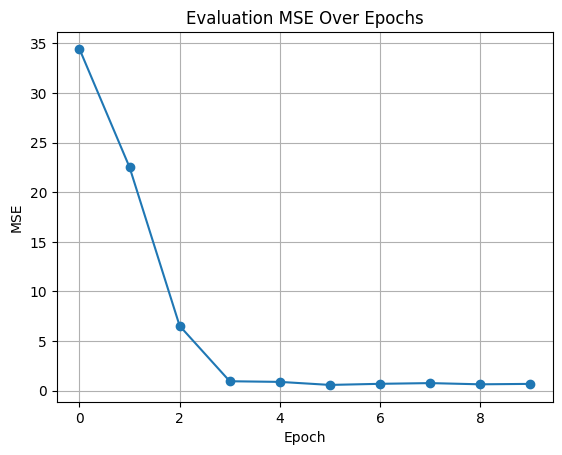

In [12]:
import json

with open('./results_1/checkpoint-650/trainer_state.json', 'r') as file:
    trainer_state = json.load(file)

mse_values = [log['eval_mse'] for log in trainer_state['log_history'] if 'eval_mse' in log]

plt.plot(mse_values, marker='o', linestyle='-')
plt.title('Evaluation MSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

Now that the training is completed, we can evaluate the model's performance on the test data frame.

In [13]:
task_1_test_results = trainer_1.evaluate(task_1_test_dataset)
print(task_1_test_results)

100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

{'eval_loss': 0.635013997554779, 'eval_mse': 0.6350140571594238, 'eval_runtime': 4.4422, 'eval_samples_per_second': 14.632, 'eval_steps_per_second': 2.026, 'epoch': 10.0}


The model achieves an impressive MSE of 0.635 on the unseen test dataframe. To better understand this, let's consider 10 actual essays from the test dataset together with their predicted and actual scores

In [15]:
predictions_output = trainer_1.predict(task_1_test_dataset)
predictions = predictions_output.predictions

predictions = predictions.squeeze()

rounded_predictions = 0.5 * np.round(predictions / 0.5)
task_1_test['predicted_score'] = rounded_predictions
sample_df = task_1_test.sample(n=10, random_state=42)

sample_df[['Question', 'Essay', 'Overall', 'predicted_score']]

100%|██████████| 9/9 [00:03<00:00,  2.56it/s]


,Question,Essay,Overall,predicted_score
1034,"The diagram below shows the life cycle of a salmon, from egg to adult fish.Summarise the information by selecting and reporting the main features and make comparisons where relevant.",The diagram illustrates the lifecycle of a salmon from spawning phase to maturity. The life of a salmon starts in the incubation period inside the eggs which is spawned in the freshwater. After the incubation period the salmon emerge from the eggs in the river and they are reared in the freshwater. The young salmon moves through the freshwater in the rives towards the estuary and completes the estuary rearing there before they migrate to the ocean.\nOnce they are in the ocean the salmon moves around searching for rearing areas and reaches its full growth and maturity. The matured salmon then migrates to spawning areas in the freshwater through the estuary for spawning. Once the salmon is emerged it goes through several stages of life to reach the maturation phase\nOverall the life cycle illustration of a salmon goes through 8 stages which is started by spawning stage of a salmon and ends when a salmon attains full growth and maturity.,5.5,7.0
352,"The charts below show the percentage of Australian men and women in three age groups who were employed in 1984, 2001 and 2014.Summarise the information by selecting and reporting the main features, and make comparisons where relevant.","These bar graphs shows who were employed among Australian females and males in three different years 1984, 2001 and 2014 including the age group of 15-19, 35-44 and 60-64.\nIt is clear from the graph that the age group 35-44 years old has the highest rate of employment among the three years of 1984, 2001 and 2014 and in both sexes.\nAccording to what is shown, in men bar graph, specifically in the 35-44 age group, the percentage did not change through out the years. While the younger group 15-19 employment percentage has been increasing from 1984 to 2001 and 2014. Additionally, older Australian people category 60-64 years old who were employed in 2014 is more than 1984 and 2001.\nOn the other hand, women in the middle age group 35-44 employment got higher with time from the year 1984 to 2001 and 2014. Furthermore, teenagers from 15-19 agre group slightly decreased in employment level in 2014. While elderly from 60-64 got more jobs in 2014.\nIn conclusion, we could say that the two age groups of 35-44 and 60-64 had higher percentage in 2014. In contrast, age group 15-19 had lower percentage by the year 2014.",6.5,6.5
886,The table below shows the salaries of secondary/high school teachers in 2009. Summarize the information by selecting and reporting the main features and make comparison where relevant.You should write at least 150 words.,"The table indicates the annual income of secondary/ high school teachers and comparisons in 2009. Overall, it can be seen an increase from starting year and after 15 years in all countries.\nTo go into detail, there are two countries, in Australia, and Denmark where teachers' annual income reached the maximum salary within 10 years. Specifically, The annual income started at 28,000, 45,000 in Australia, and Denmark respectively. Afterwards, the salaries reached 48,000, 54,000 within 9 years, and 8 years in Australia and Denmark.\nWhen it comes to other three countries, Luxembourg, Japan, and Korea, those three countries teachers steadily increased their annual income, however, they kept working after 15 years and reach maximum later. In Japan, and Korea, their annual income gradually increase the longer they worked. For example, the first years' annual income in each country is 34,000, 30,000 in Japan, and Korea respectively. After 15 years, their incomes soared to 65,000 and 48,000. As a result, their maximum income will reach the peak of 37 years, and 34 years in Japan, and Korea. The salary is 86,000, 64,000 in Japan, and Korea.\nInterestingly, in Luxembourg, the annual saralies start at 8

For some of these essays, the model can predict the exact score (indices 352, 1102 and 1218), while for others the predicted scores are relatively close (within 1 point) to the actual score (indices 216, 426, 886, 992, 1256). It's also notable that a few of the predictions fall outside of that 1 point window (indices 1034, 1200).

The pie chart below provides percentages for each of the rows in the test dataset to help better visualize the model's performance, with four categories: 
1) Exact matches
2) Predictions within 0.5 of the actual score
3) Predictions within 1 of the actual score
4) Predictions off by more than 1 point

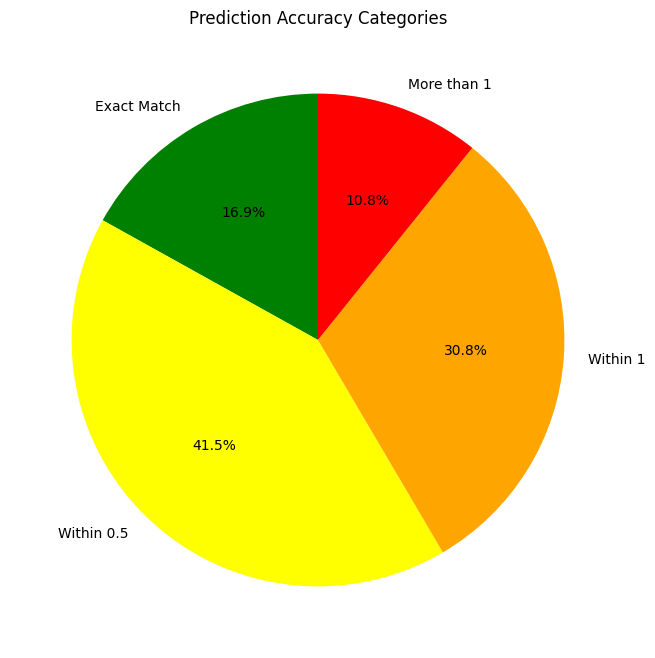

In [16]:
task_1_test['difference'] = np.abs(task_1_test['Overall'] - task_1_test['predicted_score'])

conditions = [
    (task_1_test['difference'] == 0),
    (task_1_test['difference'] > 0) & (task_1_test['difference'] <= 0.5),
    (task_1_test['difference'] > 0.5) & (task_1_test['difference'] <= 1),
    (task_1_test['difference'] > 1)
]

categories = ['Exact Match', 'Within 0.5', 'Within 1', 'More than 1']
colors = ["green", "yellow", "orange", "red"]

task_1_test['category'] = np.select(conditions, categories)

category_counts = task_1_test['category'].value_counts().reindex(categories)

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('Prediction Accuracy Categories')
plt.show()

The model only achieves exact matches for 16.9% of the test data. However, it's important to note that the writing scores are inherently subjective, meaning the mistakes by 0.5 point or 1 point are not severe failures. In fact, 89.2% of the predicted scores fall within 1 point of the actual score, indicating the strength of the model in imitating IELTS grading. 

### Task 2 Model ###

We can build a similar BERT-based model for Task 2. Just like for Task 1, three Pandas DataFrames for training, validation, and testing are created from the full DataFrame with 80%-10%-10% ratio for training-validation-testing. We can again use the prepare_dataset function developed earlier to build the PyTorch Datasets.

In [17]:
task_2_train, task_2_temp = train_test_split(df_task_2, test_size=0.2, random_state=42)
task_2_val, task_2_test = train_test_split(task_2_temp, test_size=0.5, random_state=42)

task_2_train_dataset = prepare_dataset(task_2_train)
task_2_val_dataset = prepare_dataset(task_2_val)
task_2_test_dataset = prepare_dataset(task_2_test)

Since the data and the task is rather similar, we set the same hyperparameters for Task 2 as those for Task 1, only changing the output directory

In [18]:
model_2 = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                        config=config)

training_args_2 = TrainingArguments(
    output_dir='./results_2',          
    num_train_epochs=10,              
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    load_best_model_at_end=True,
    metric_for_best_model="mse",
    greater_is_better=False
)

trainer_2 = Trainer(
    model=model_2,
    args=training_args_2,
    train_dataset=task_2_train_dataset,
    eval_dataset=task_2_val_dataset,
    compute_metrics=compute_metrics
)

trainer_2.train()

model_path = "./results_2"
model_2.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/seyedmasihzakavi/Library/Python/3.9/lib/python/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
                                                
 10%|█         | 80/800 [02:28<17:55,  1.49s/it]

{'eval_loss': 37.36153030395508, 'eval_mse': 37.36152267456055, 'eval_runtime': 6.1311, 'eval_samples_per_second': 12.885, 'eval_steps_per_second': 1.631, 'epoch': 1.0}


                                                 
 20%|██        | 160/800 [06:00<18:29,  1.73s/it]

{'eval_loss': 16.389707565307617, 'eval_mse': 16.38970184326172, 'eval_runtime': 5.6785, 'eval_samples_per_second': 13.912, 'eval_steps_per_second': 1.761, 'epoch': 2.0}


                                                 
 30%|███       | 240/800 [09:07<16:40,  1.79s/it]

{'eval_loss': 3.080759048461914, 'eval_mse': 3.0807595252990723, 'eval_runtime': 5.677, 'eval_samples_per_second': 13.916, 'eval_steps_per_second': 1.761, 'epoch': 3.0}


                                                 
 40%|████      | 320/800 [12:13<14:53,  1.86s/it]

{'eval_loss': 0.8504762053489685, 'eval_mse': 0.8504760265350342, 'eval_runtime': 6.3027, 'eval_samples_per_second': 12.534, 'eval_steps_per_second': 1.587, 'epoch': 4.0}


                                                 
 50%|█████     | 400/800 [15:18<11:45,  1.76s/it]

{'eval_loss': 0.688987672328949, 'eval_mse': 0.6889877319335938, 'eval_runtime': 5.7165, 'eval_samples_per_second': 13.82, 'eval_steps_per_second': 1.749, 'epoch': 5.0}


                                                 
 60%|██████    | 480/800 [18:21<09:51,  1.85s/it]

{'eval_loss': 1.4739162921905518, 'eval_mse': 1.47391676902771, 'eval_runtime': 6.3521, 'eval_samples_per_second': 12.437, 'eval_steps_per_second': 1.574, 'epoch': 6.0}


 62%|██████▎   | 500/800 [19:10<11:18,  2.26s/it]

{'loss': 13.7737, 'grad_norm': 74.68917083740234, 'learning_rate': 1e-05, 'epoch': 6.25}


                                                 
 70%|███████   | 560/800 [21:25<06:47,  1.70s/it]

{'eval_loss': 0.742181122303009, 'eval_mse': 0.7421810030937195, 'eval_runtime': 5.7977, 'eval_samples_per_second': 13.626, 'eval_steps_per_second': 1.725, 'epoch': 7.0}


                                                 
 80%|████████  | 640/800 [24:40<05:17,  1.98s/it]

{'eval_loss': 0.7955295443534851, 'eval_mse': 0.7955293655395508, 'eval_runtime': 6.3723, 'eval_samples_per_second': 12.397, 'eval_steps_per_second': 1.569, 'epoch': 8.0}


                                                 
 90%|█████████ | 720/800 [28:07<02:43,  2.05s/it]

{'eval_loss': 0.48972833156585693, 'eval_mse': 0.48972833156585693, 'eval_runtime': 6.9466, 'eval_samples_per_second': 11.372, 'eval_steps_per_second': 1.44, 'epoch': 9.0}


                                                 
100%|██████████| 800/800 [31:31<00:00,  1.83s/it]

{'eval_loss': 0.8300278186798096, 'eval_mse': 0.83002769947052, 'eval_runtime': 6.7384, 'eval_samples_per_second': 11.724, 'eval_steps_per_second': 1.484, 'epoch': 10.0}


100%|██████████| 800/800 [31:35<00:00,  2.37s/it]


{'train_runtime': 1895.0298, 'train_samples_per_second': 3.346, 'train_steps_per_second': 0.422, 'train_loss': 8.716188135147094, 'epoch': 10.0}


('./results_2/tokenizer_config.json',
 './results_2/special_tokens_map.json',
 './results_2/vocab.txt',
 './results_2/added_tokens.json',
 './results_2/tokenizer.json')

Like for task 1, the graph for task 2 indicates that the model has learned to grade essays for the task. This is reflected in the decline in loss, with evaluation MSE loss reaching 0.489

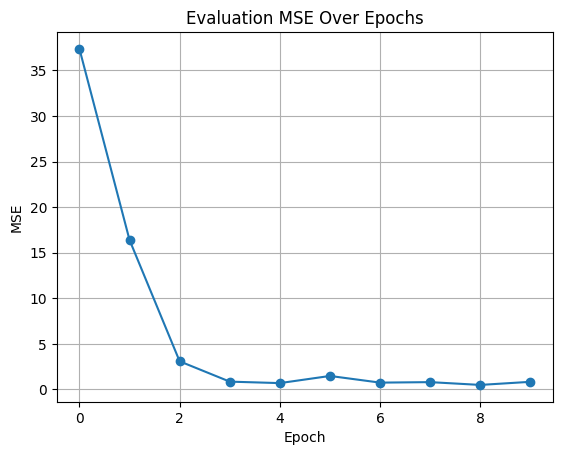

In [19]:
with open('./results_2/checkpoint-800/trainer_state.json', 'r') as file:
    trainer_state = json.load(file)

mse_values = [log['eval_mse'] for log in trainer_state['log_history'] if 'eval_mse' in log]

plt.plot(mse_values, marker='o', linestyle='-')
plt.title('Evaluation MSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

Just as task 1, we consider 10 actual essays to better understand the model's predictions

In [20]:
task_2_test_results = trainer_2.evaluate(task_2_test_dataset)
print(task_2_test_results)

100%|██████████| 10/10 [00:04<00:00,  2.18it/s]

{'eval_loss': 0.6170971393585205, 'eval_mse': 0.6170971393585205, 'eval_runtime': 6.4582, 'eval_samples_per_second': 12.387, 'eval_steps_per_second': 1.548, 'epoch': 10.0}


In [21]:
predictions_output = trainer_2.predict(task_2_test_dataset)
predictions = predictions_output.predictions

predictions = predictions.squeeze()

rounded_predictions = 0.5 * np.round(predictions / 0.5)
task_2_test['predicted_score'] = rounded_predictions
sample_df = task_2_test.sample(n=10, random_state=42)

sample_df[['Question', 'Essay', 'Overall', 'predicted_score']]

100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


,Question,Essay,Overall,predicted_score
1279,"Some people believe that we cannot learn anything from the past for our life today, while others believe that history is a valuable source of information to understand human's life.Discuss both views and give your opinion.Give reasons for your answer and include any relevant examples from your own knowledge or experience.","History of human's life enriches us with pivotal informations .Some people believe no matter how valuable these informations , we often make our experiences and learn from our mistakes . However others stick with an idea that history of people can teach us alot of beneficial lessons . In my opinon , nobody can underestimate the past as it provides us many priceless wisdoms and precious informations .\nFollowing essay will discuss both sides argumaents and will give reasons for my personal opinion about topic mentioned above .\nGeneral perception propagates that we learn only from our experiences.Those people who claim this idea believe that we should not inherit the history of our ancesrties , neither their mistakes nor their success. While past had done and people cant change it , as a result of that we can't live their failure or success and we are reponsible for our life only . Nevertheless , today individuals can't think the same way our old generations had . For instance ,a person who lived centuries before had different problems , diffrent type of job , and different life style, so it's no sense to waste time digging for informations about him , therefore our choices and decisions should be based on our experiences and our knowledge only .\nHowever, in my opinon , past will provide us a perfect picture for our present and reflect the future . Whilst the development that happened in all aspects of our life had resulted from accumulated experiences of other people who lived in the past . Hence their experiences including failiures and success enrolled into our life and depict recent picture we live today . Furthermore past could leverage lessons how to avoid mistakes , for example if we read the history of some countries and understand the reasons behind revolutions and civil diputes then we can put solutions for our problems at present, and avoid falling in intesive wrestles in future. Do we have the courage to do so ?\nTo sum up, we need to learn more about the history of old people and try to figure out their problems and analyse their flaws .Hence we can solve many incoming problems we could face in future .",6.5,6.0
1311,Providing a national system in a country where the unemployed receive a regular payment only encourages people not to seek work and puts an unreasonable strain on a country’s financial resources.Discuss this statement and give your opinion.Give reasons for your answer and include any relevant examples from your knowledge or experience.You should write at least 250 words.,"In modern day society, money is a driving force for nearly everyone. Most people aspire to be financially secure and to have the ability to live the life they want. However, not everyone is able to find paid employment, and for that reason in some countries around the world, governments have initiated a system where the unemployed receive a regular payment to enable them to survive. Some people believe it is an excellent idea, whilst others believe that it is exhausting a country’s financial resources.When looking at the positive aspects of this system, it can be said that it prevents individuals from having a private bankruptcy. When somebody becomes unemployed, he or she will have on-going costs such as rent for a dwelling, bills for water, telephone and electricity as well as the cost of food and several other things. Without a salary, this person will fall into debt, because they will be unable to cover these expenses. A national unemployment payment system will therefore prevent this person from losing nearly everything over time. Without such system, many people 

Compared to task 1, the model's predictions seem to be closer to the actual grades for task 2. Out of the 10 randomly sampled essays, only one shows a severe (more than 1 point) mistake in predicting the grade. The pie chart for all the test data can provide a better means for comparing the two models

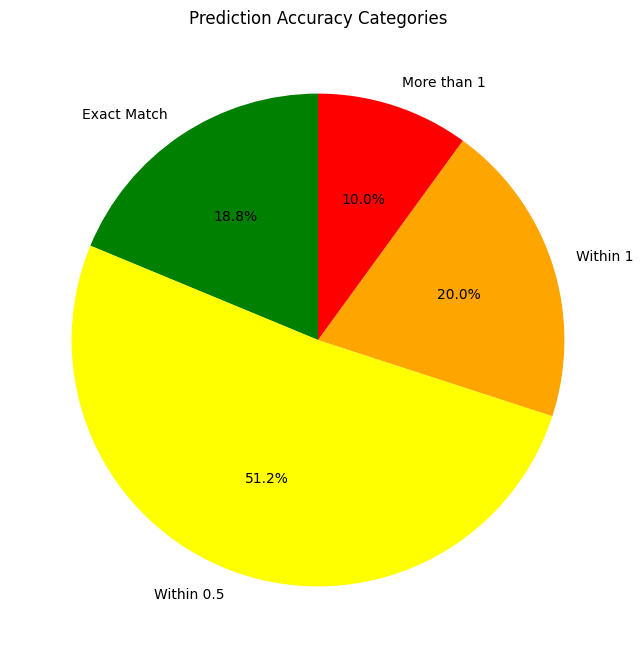

In [22]:
task_2_test['difference'] = np.abs(task_2_test['Overall'] - task_2_test['predicted_score'])

conditions = [
    (task_2_test['difference'] == 0),
    (task_2_test['difference'] > 0) & (task_2_test['difference'] <= 0.5),
    (task_2_test['difference'] > 0.5) & (task_2_test['difference'] <= 1),
    (task_2_test['difference'] > 1)
]

categories = ['Exact Match', 'Within 0.5', 'Within 1', 'More than 1']
colors = ["green", "yellow", "orange", "red"]

task_2_test['category'] = np.select(conditions, categories)

category_counts = task_2_test['category'].value_counts().reindex(categories)

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('Prediction Accuracy Categories')
plt.show()

As expected, the model for task 2 is better than the one for task 1. There are more exact matches and the number of severe mistakes has also marginally decreased. More notably, 70% of the preedictions are within 0.5 of the actual score, far more than the 58.4% for task 1

### Discussion ###

The Model's superior performance on task 2 can be explained by more training data for task 2 and the longer essays allowing for more consistent grading. Another key factor for understanding the better performance is the absence of the visuals for task 1. The model has no means of realistically verifying the essay's understanding of the chart and graph since those are not provided to the model. Since task achievement for task 1 is providing a clear description of the visual, this severely limits the model's ability to make accurate predictions. A better model would condition the grading on a representation of the visual. However, this would require a multimodal transformer and more computational resources. 

It's also crucial to note that the amount of data for both of these tasks is very limited due to privacy reasons. Even with only 1435 tasks provided in total, BERT achieved close predictions for 90% of the essays for both tasks. With more data and better diversity in the data, its plausible that BERT could achieve even higher accuracy in grading.